# Data Cleaning
Aqui vamos realizar toda a etapa de limpeza dos dados para nossa analise de dados



# Importando bibliotecas


In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import datetime

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [2]:
# importar os conjuntos de dados

# game: Reúne os registros de cada jogo no conjunto de dados
game = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game.csv")

# game_golie_stats: As estatísticas dos goleiros que participaram dos jogos
game_golie_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_goalie_stats.csv")

# game_plays: As jogadas individuais de cada jogo
#game_plays = pd.read_csv("https://dl.dropbox.com/s/r34sk4632lphbcz/game_plays.csv?dl=0")
    
# game_plays_player: Os jogadores envolvidos em uma jogada
#game_plays_player = pd.read_csv("https://dl.dropbox.com/s/9bafo0bjc1fs7wm/game_plays_players.csv?dl=0")
    
# game_shifts: Detalhes a respeito dos turnos dos jogadores
#game_shifts = pd.read_csv("https://dl.dropbox.com/s/j8s06eo3osisrr0/game_shifts.csv?dl=0")

# game_skater_stats: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time
#game_skater_stats = pd.read_csv("https://dl.dropbox.com/s/apvje2rso032qjm/game_skater_stats.csv?dl=0")

# game_teams_stats: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe
game_teams_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_teams_stats.csv")

# player_info: Informações sobre os jogadores
player_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/player_info.csv")

# team_info: informação sobre as equipes
team_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/team_info.csv")

In [3]:
game.head(3)

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [4]:
team_info.head(3)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26


In [5]:
game_teams_stats.head(3)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [6]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


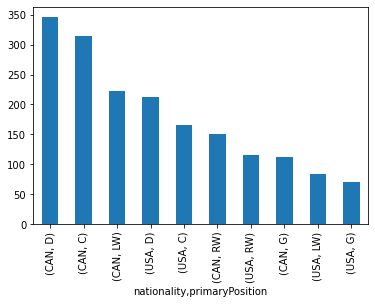

In [7]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

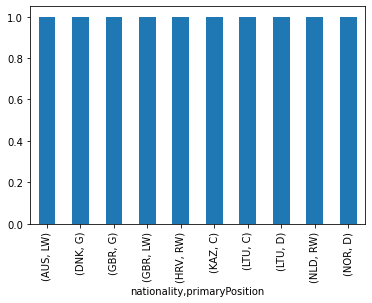

In [8]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values()[:10].plot(kind='bar')

In [9]:
table = player_info.groupby(['nationality'])['primaryPosition'].value_counts().to_frame()

In [10]:
table = table.unstack()

In [11]:
table.fillna(0, inplace=True)

In [12]:
table.rename(columns={'primaryPosition':'num_jogadores'}, inplace=True)

In [13]:
table

num_jogadores                            
primaryPosition             C      D      G     LW     RW
nationality                                              
AUS                       0.0    0.0    0.0    1.0    0.0
AUT                       0.0    0.0    0.0    2.0    2.0
BHS                       1.0    0.0    0.0    0.0    0.0
BLR                       1.0    3.0    0.0    2.0    0.0
CAN                     314.0  346.0  113.0  223.0  150.0
CHE                       4.0    9.0    3.0    2.0    6.0
CZE                      20.0   30.0   13.0   10.0   23.0
DEU                       6.0    4.0    5.0    3.0    2.0
DNK                       4.0    2.0    1.0    2.0    5.0
FIN                      21.0   25.0   20.0   19.0   15.0
FRA                       2.0    2.0    0.0    2.0    0.0
GBR                       0.0    0.0    1.0    1.0    0.0
HRV                       0.0    0.0    0.0    0.0    1.0
KAZ                       1.0    0.0    0.0    0.0    0.0
LTU                       1.0    1.0    0.0    0.0    0.0
LVA                       2.0    3.0    2.0    4.0    0.0
NGA                       0.0    0.0    0.0    0.0    1.0
NLD                       0.0    0.0    0.0    0.0    1.0
NOR                       0.0    1.0    0.0    1.0    1.0
RUS                      19.0   30.0   11.0   16.0   23.0
SVK                       5.0    9.0    2.0    4.0    5.0
SVN                       1.0    0.0    0.0    1.0    0.0
SWE                      43.0   65.0   22.0   34.0   20.0
UKR                       0.0    1.0    0.0    2.0    0.0
USA                     165.0  212.0   71.0   83.0  116.0

In [14]:
teste = pd.merge(game, game_teams_stats, on='game_id')

In [15]:
teste.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [16]:
game.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [17]:
team_dict = team_info.set_index('team_id')['teamName'].to_dict()


In [18]:
team_dict

{1: 'Devils',
 4: 'Flyers',
 26: 'Kings',
 14: 'Lightning',
 6: 'Bruins',
 3: 'Rangers',
 5: 'Penguins',
 17: 'Red Wings',
 28: 'Sharks',
 18: 'Predators',
 23: 'Canucks',
 16: 'Blackhawks',
 9: 'Senators',
 8: 'Canadiens',
 30: 'Wild',
 15: 'Capitals',
 19: 'Blues',
 24: 'Ducks',
 27: 'Coyotes',
 2: 'Islanders',
 10: 'Maple Leafs',
 13: 'Panthers',
 7: 'Sabres',
 20: 'Flames',
 21: 'Avalanche',
 25: 'Stars',
 29: 'Blue Jackets',
 52: 'Jets',
 22: 'Oilers',
 54: 'Golden Knights',
 12: 'Hurricanes',
 53: 'Coyotes',
 11: 'Thrashers'}

In [19]:
# aplicando no nosso DataFrame
teste['away_team_id'].replace(team_dict, inplace=True)
teste['home_team_id'].replace(team_dict, inplace=True)

In [20]:
teste.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,Devils,Flyers,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,Devils,Flyers,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,Devils,Flyers,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,Devils,Flyers,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,Flyers,Devils,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [21]:
cols_drop = ['date_time_GMT', 'outcome', 'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
             'venue_time_zone_offset', 'venue_time_zone_tz']

In [22]:
nhl_eda = teste.drop(labels=cols_drop, axis=1)

In [23]:
nhl_eda.head(3)

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [24]:
for column in ['date_time']:
    nhl_eda[column] = pd.to_datetime(nhl_eda[column], errors='coerce')

In [25]:
# criando coluna resultado
nhl_eda['outcome'] = nhl_eda['won'].map({False:'Lose', True:'Win'})

# excluindo coluna redundante
nhl_eda.drop('won', axis=1, inplace=True)

In [26]:
nhl_eda.head()

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,1,away,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,Lose
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,4,home,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,Win
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,1,away,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,Win
3,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,4,home,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6,Lose
4,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,4,away,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1,Lose


In [27]:
# Series with number of wins
teams_wins = nhl_eda[nhl_eda['outcome']=='Win']['team_id'].value_counts()

# Series with number of defeats
team_deafeats = nhl_eda[nhl_eda['outcome']=='Lose']['team_id'].value_counts()

# concatenando Series 
teams_performance = pd.concat([teams_wins, team_deafeats], axis=1, keys=['wins','deafeats'])

# add columns with number of total games
teams_performance['total_games'] = teams_performance['wins'] + teams_performance['deafeats']

# add column with win rate
teams_performance['win_rate_%'] = round(teams_performance['wins']/teams_performance['total_games'], 4)


In [28]:
teams_performance

,wins,deafeats,total_games,win_rate_%
1,328,405,733,0.4475
2,352,384,736,0.4783
3,426,376,802,0.5312
4,367,378,745,0.4926
5,478,337,815,0.5865
6,465,347,812,0.5727
7,276,435,711,0.3882
8,380,371,751,0.5060
9,338,408,746,0.4531
10,341,390,731,0.4665


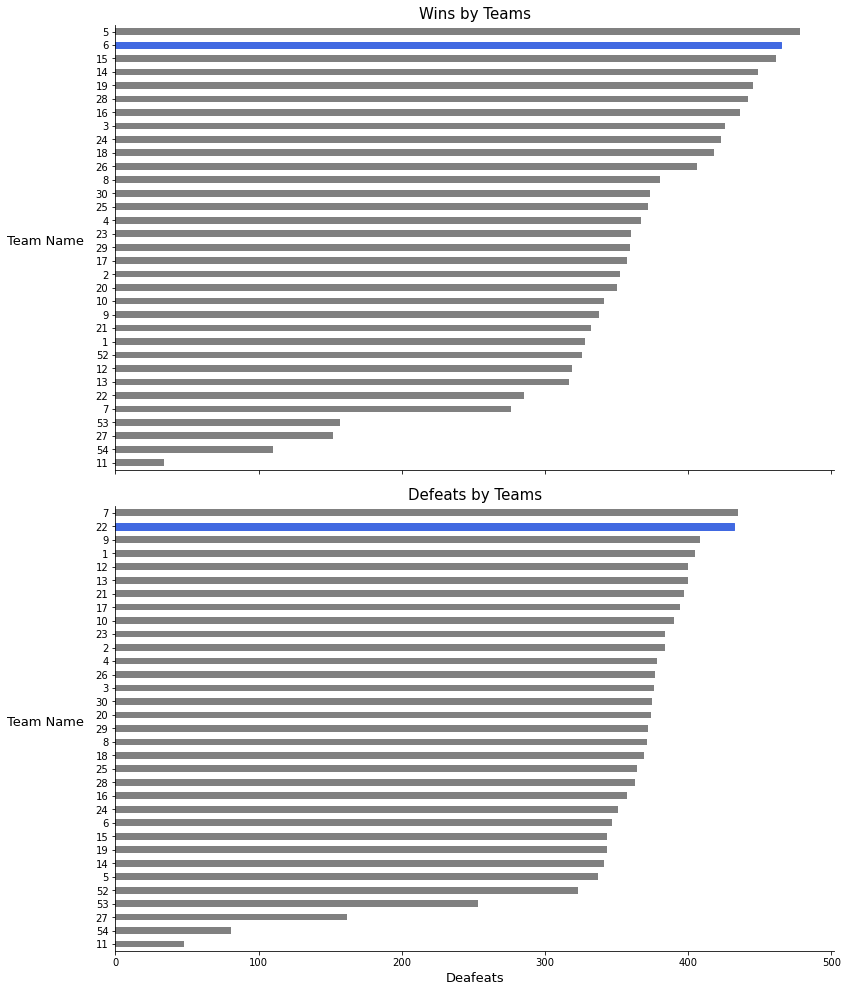

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True, figsize=(12, 14))
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=12)

# wins
teams_performance['wins'].sort_values().plot(kind='barh', color='gray', ax=ax1)
ax1.set_title("Wins by Teams", fontsize=15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.patches[31].set_color('royalblue')
ax1.set_xlabel('Wins', fontsize=13)
ax1.set_ylabel('Team Name', fontsize=13, rotation=0, labelpad=50)


# loses
teams_performance['deafeats'].sort_values().plot(kind='barh', color='gray', ax=ax2)
ax2.set_title("Defeats by Teams", fontsize=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.patches[31].set_color('royalblue')
ax2.set_xlabel('Deafeats', fontsize=13)
ax2.set_ylabel('Team Name', fontsize=13, rotation=0, labelpad=50)

plt.tight_layout(pad=1.5)

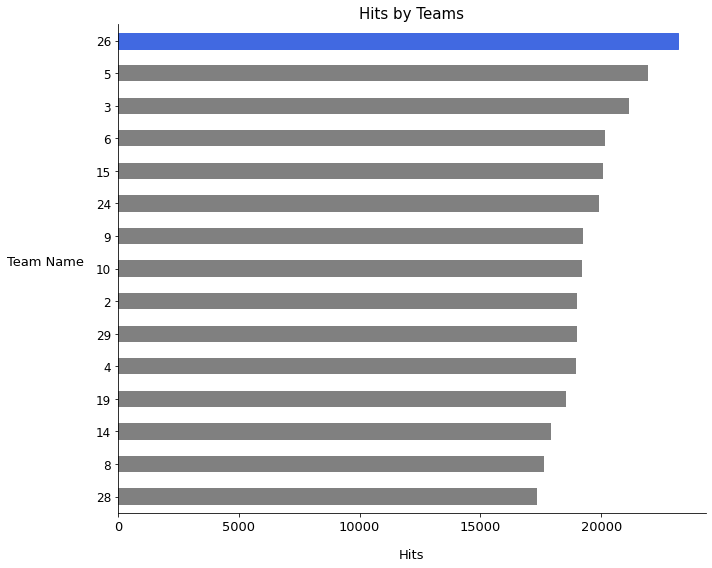

In [30]:
teams_hits = nhl_eda.groupby(['team_id'])['hits'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(10, 8))
teams_hits.sort_values().plot(kind='barh', color='gray', ax=ax)
# nomeando
ax.set_title("Hits by Teams", fontsize=15)
ax.set_ylabel("Team Name",fontsize=13, rotation= 0, labelpad=50)
ax.set_xlabel("Hits", fontsize=13, labelpad=15)


# estilizando
ax.patches[14].set_color('royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

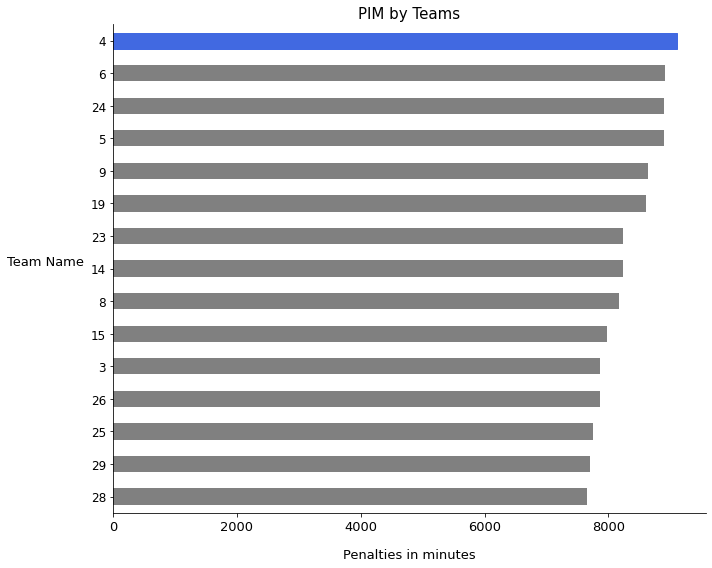

In [31]:
teams_pim = nhl_eda.groupby(['team_id'])['pim'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(10, 8))
teams_pim.sort_values().plot(kind='barh', color='gray', ax=ax)
# nomeando
ax.set_title("PIM by Teams", fontsize=15)
ax.set_ylabel("Team Name",fontsize=13, rotation= 0, labelpad=45)
ax.set_xlabel("Penalties in minutes", fontsize=13, labelpad=15)

# estilizando
ax.patches[14].set_color('royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

In [34]:
# goals
nhl_eda.head(3)

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,1,away,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,Lose
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,4,home,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,Win
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,1,away,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,Win


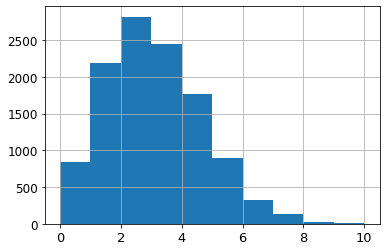

In [37]:
nhl_eda[nhl_eda['HoA']=='away']['goals'].hist()

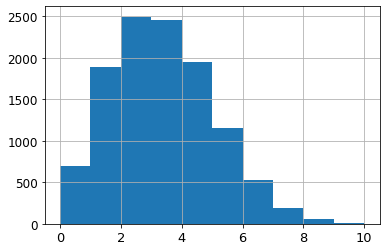

In [38]:
nhl_eda[nhl_eda['HoA']=='home']['goals'].hist()

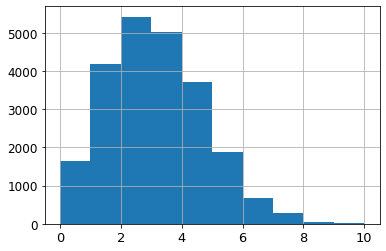

In [39]:
nhl_eda['away_goals'].hist()

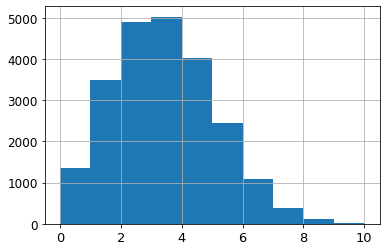

In [40]:
nhl_eda['home_goals'].hist()